# Rarefaction

Rarefaction curves plot the number of unique species (in our case, unique antibody clonotypes) against the total sample size. "Bending" of the rarefaction curve toward a horizontal line indicates the sampling depth is approaching saturation. In this notebook, we will generate the following plots:

 * Rarefaction curve (**Figure 2a**)
 * Rarefaction curve inset (**Figure 2a**)

The following Python packages are required to run this notebook:

  * numpy
  * matplotlib
  * seaborn
  * [abutils](https://www.github.com/briney/abtools)
  
They can be installed by running `pip install numpy matplotlib seaborn abutils`.

In [1]:
from __future__ import print_function, division

import os
import subprocess as sp
import sys
import tempfile

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from abutils.utils.pipeline import list_files, make_dir
from abutils.utils.progbar import progress_bar

%matplotlib inline

### Subjects, input file, and colors

The repeat observation subsampling data in our manuscript is included in this Github repository. However, if you've generated your own input data (either independently or using the code provided [**here**](LINK) using something other than the default output location) and you've saved that data to a different location, please modify the path/filename below.

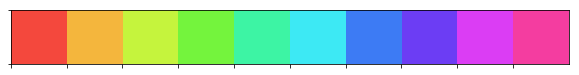

In [4]:
# subjects
with open('../data_processing/data/subjects.txt') as f:
    subjects = sorted(f.read().split())
    
# input file
input_path = '../data_processing/data/equal_fraction_downsampling/'
input_filename = 'clonotype-downsampling_duplicate-counts_vj-aa.txt'
input_file = os.path.join(input_path, input_filename)

# colors
colors = sns.hls_palette(10, s=0.9)
colors[3] = sns.hls_palette(11, s=0.9)[3]
colors[4] = sns.hls_palette(12, s=0.9)[5]

color_dict = {s: c for s, c in zip(subjects, colors)}

sns.palplot(colors)

## Load data 

In [5]:
with open(input_file) as f:
    data = f.read()

xs, ys = [], []
for subject_chunk in data.split('#')[1:]:
    xdata = []
    ydata = []
    subject = subject_chunk.split('>')[0].strip()
    for fraction in subject_chunk.split('>')[1:]:
        frac = float(fraction.split('\n')[0].strip())
        yvals = []
        for iteration in fraction.split('\n')[1:]:
            if not iteration.strip():
                continue
            l = [i.strip().split(':') for i in iteration.strip().split()]
            c = {int(k): float(v) for k, v in l}
            obs = float(sum(c.values()))
            total = float(sum([k * v for k, v in c.items()]))
            yval = obs / total * frac
            yvals.append(yval)
        ydata.append(np.mean(yvals))
        xdata.append(frac)
    xs.append(xdata)
    ys.append(ydata)

## Rarefaction lineplot

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the below code block.

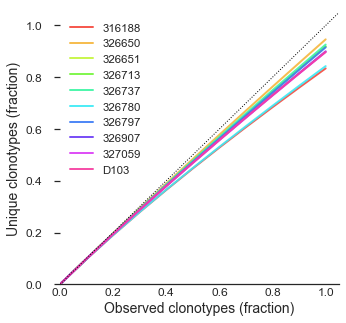

In [9]:
# initialize plot
sns.set_style('white')
plt.figure(figsize=(5, 5))

# plot rarefaction data
for xdata, ydata, subject, color in zip(xs, ys, subjects, colors):
    plt.plot([0] + xdata, [0] + ydata, c=color, label=subject, linewidth=2, alpha=0.9)

# plot diagonal reference line
plt.plot((0, 1.1), (0, 1.1), 'k:', linewidth=1)

# style the plot
ax = plt.gca()
# plot legend
ax.legend(loc='upper left', fontsize=11.5)
# set axis limits and labels
ax.set_xlim((0, 1.05))
ax.set_ylim((0, 1.05))
ax.set_xlabel('Observed clonotypes (fraction)', fontsize=14)
ax.set_ylabel('Unique clonotypes (fraction)', fontsize=14)
# style ticks
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12, length=6, width=1.25, pad=12, right=False)
# hide top, left and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# save or show
plt.show()
# plt.tight_layout()
# plt.savefig('./figures/rarefaction_per-subject_by-fraction.pdf')

## Rarefaction inset

If you'd like to save the figure file (rather than just showing inline without saving), comment out the `plt.show()` line and uncomment the final two lines of the code block.

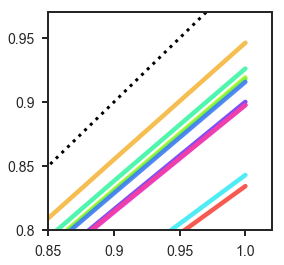

In [10]:
# initialize plot
sns.set_style('white')
plt.figure(figsize=(4, 4))

# plot rarefaction data
for xdata, ydata, subject, color in zip(xs, ys, subjects, colors):
    plt.plot([0] + xdata, [0] + ydata, c=color, label=subject, linewidth=4.5, alpha=0.9)

# plot diagonal reference line
plt.plot((0, 1.1), (0, 1.1), 'k:', linewidth=3)

# style plot
ax = plt.gca()
# set axis limits
ax.set_xlim((0.85, 1.02))
ax.set_ylim((0.8, 0.97))
# style ticks
ax.set_xticks([0.85, 0.9, 0.95, 1], )
ax.set_xticklabels(['0.85', '0.9', '0.95', '1.0'], size=12)
ax.set_yticks([0.8, 0.85, 0.9, 0.95], )
ax.set_yticklabels(['0.8', '0.85', '0.9', '0.95'], size=12)
ax.tick_params(axis='x', labelsize=14, pad=8, length=6, width=2, top=False)
ax.tick_params(axis='y', labelsize=14, pad=8, length=6, width=2, right=False)
# style the spines
[i.set_linewidth(2) for i in ax.spines.values()]

# save or show
plt.show()
# plt.tight_layout()
# plt.savefig('./figures/rarefaction_per-subject_by-fraction_inset.pdf')